# Data discretization

## Introduction
Data discretization bhot important hai. Data discretization ka matlab hai ke hum data ko bins mein divide kar rahe hain. Jese ke agar hum age ko discretize karna chahte hain to hum age ko bins mein divide kar sakte hain jese ke 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, 91-100. Is tarah se hum data ko bins mein divide kar sakte hain. Is se hume kuch faida hota hai jese ke hume data ko samajhne mein asani hoti hai, data ko visualize karne mein asani hoti hai, data ko analyze karne mein asani hoti hai, data ko model karne mein asani hoti hai, data ko interpret karne mein asani hoti hai, data ko compare karne mein asani hoti hai, data ko store karne mein asani hoti hai, data ko share karne mein asani hoti hai, data ko compress

example : jese apky pas age ka column hai to age ko bins mein divide karke ap usko use kar sakte hain. jese young, middle age, old age.etc..


In [2]:
# libraries for disctretization
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer





In [5]:
# load the data
data = sns.load_dataset('titanic')

data.head()




,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# impute missing values
data['age'] = data['age'].fillna(data['age'].median())
data['fare'] = data['fare'].fillna(data['fare'].median())

<Axes: xlabel='age', ylabel='Count'>

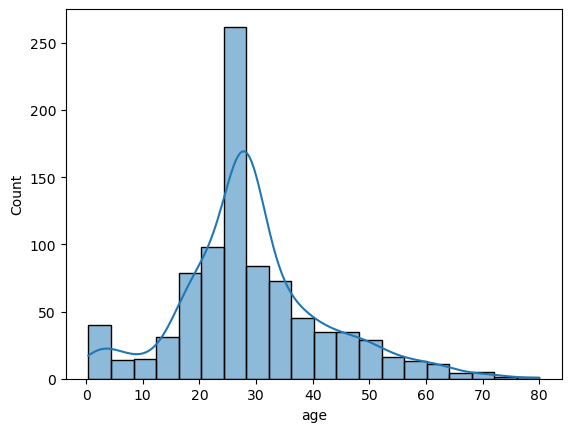

In [12]:
# histplot age 
sns.histplot(data['age'], kde=True, bins=20)

In [19]:
# discretize the age 
age_discretizer= KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
data['age_discretized'] = age_discretizer.fit_transform(data['age'].values.reshape(-1, 1))
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_discretized
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0


<Axes: xlabel='age', ylabel='Count'>

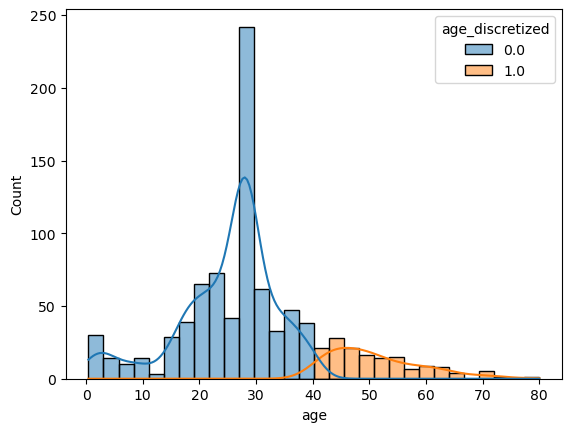

In [20]:
# histplot age_discretized
sns.histplot(data,  x='age', hue= 'age_discretized' , kde=True)